In [1]:
#Naive Bayes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
veriseti=pd.read_excel("Datasets/Immunotherapy.xlsx") 
veriseti

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [3]:
X=veriseti.iloc[:,:-1]
y=veriseti.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, shuffle=True, stratify=y)

In [4]:
#öznitelik ölçeklendirme
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test) 

In [5]:
from sklearn.naive_bayes import GaussianNB 
naive=GaussianNB()
naive.fit(X_train, y_train) 
y_pred=naive.predict(X_test) 
print(naive.score(X_train, y_train))
print(naive.score(X_test, y_test))

0.8507462686567164
0.782608695652174


              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.84      0.89      0.86        18

    accuracy                           0.78        23
   macro avg       0.67      0.64      0.65        23
weighted avg       0.77      0.78      0.77        23



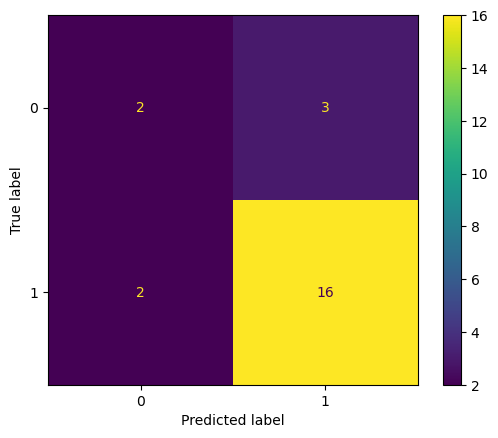

In [12]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay 

print(classification_report(y_test, y_pred))
hm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=hm)
disp.plot();